In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt

# we will be choosing 2 features only so as to plot them and visualize the decision Boundary for SVM

In [2]:
irisdata = datasets.load_iris();
# x = irisdata.data;
x = irisdata.data[:,0:2];
y = irisdata.target
print(x.shape,y.shape);

(150, 2) (150,)


In [3]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1);
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape);

(120, 2) (120,) (30, 2) (30,)


In [4]:
from sklearn.svm import SVC
# clf = SVC(kernel = "linear");
clf = SVC();
clf.fit(xtrain,ytrain);

# Plotting features and visualizing decision Boundary 

In [5]:
def makegrid(x1,x2,h = 0.02):
    x1min = x1.min() - 1;
    x1max = x1.max() + 1;
    x2min = x2.min() - 1;
    x2max = x2.max() + 1;
    a = np.arange(x1min,x1max,h);
    b = np.arange(x2min,x2max,h);
    return np.meshgrid(a,b);

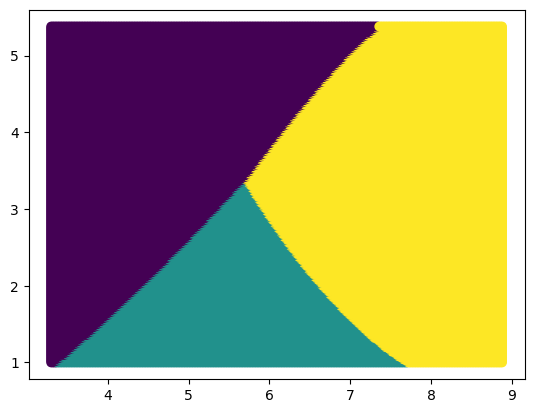

In [6]:
a,b = makegrid(x[:,0],x[:,1]);
test = np.c_[a.ravel(),b.ravel()];
pred = clf.predict(test);
plt.scatter(a.ravel(),b.ravel(),c = pred);

In [7]:
# example
x1 = np.array([1,3]);
x2 = np.array([5,6]);
a,b = makegrid(x1,x2);
print(a);
print(b);

[[0.   0.02 0.04 ... 3.94 3.96 3.98]
 [0.   0.02 0.04 ... 3.94 3.96 3.98]
 [0.   0.02 0.04 ... 3.94 3.96 3.98]
 ...
 [0.   0.02 0.04 ... 3.94 3.96 3.98]
 [0.   0.02 0.04 ... 3.94 3.96 3.98]
 [0.   0.02 0.04 ... 3.94 3.96 3.98]]
[[4.   4.   4.   ... 4.   4.   4.  ]
 [4.02 4.02 4.02 ... 4.02 4.02 4.02]
 [4.04 4.04 4.04 ... 4.04 4.04 4.04]
 ...
 [6.94 6.94 6.94 ... 6.94 6.94 6.94]
 [6.96 6.96 6.96 ... 6.96 6.96 6.96]
 [6.98 6.98 6.98 ... 6.98 6.98 6.98]]


In [8]:
ypred = clf.predict(xtest);
print(ypred.shape);
score = clf.score(xtest,ytest);
print(score);

(30,)
0.8333333333333334


In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(ytest,ypred);
print(score);

0.8333333333333334


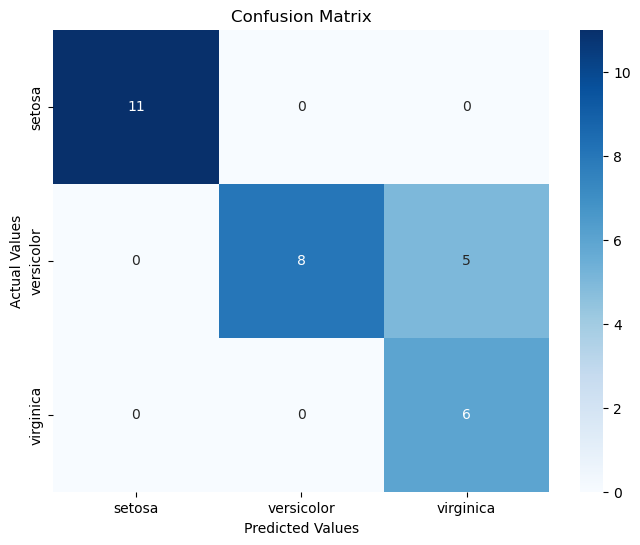

In [10]:
import seaborn as sns 
cm = confusion_matrix(ytest,ypred);
arr = irisdata.target_names;
plt.figure(figsize = (8,6));
sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels = arr,yticklabels = arr);
plt.title("Confusion Matrix");
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");

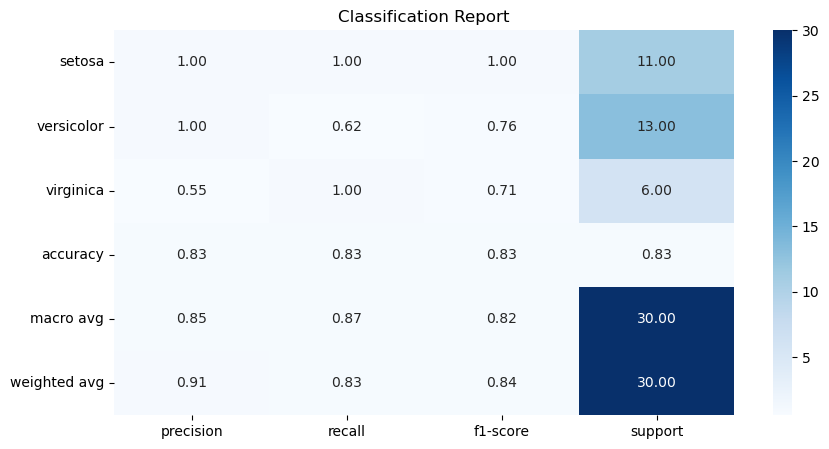

In [11]:
report = classification_report(ytest,ypred,output_dict = True,target_names = arr);
df = pd.DataFrame(report).transpose();
plt.figure(figsize = (10,5));
sns.heatmap(df,annot = True,fmt = ".2f",cmap = "Blues");
plt.title("Classification Report");